In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed May 10 06:51:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
!unzip '/content/drive/MyDrive/Car_price.zip' -d '/content'

Archive:  /content/drive/MyDrive/Car_price.zip
  inflating: /content/test.csv       
  inflating: /content/train.csv      


In [34]:
!mv '/content/test.csv' '/content/Dataset'

In [35]:
!mv '/content/train.csv' '/content/Dataset'

In [6]:
#Importing the necessary Libraries

# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import various functions to perform regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor

#importing metrics for tabulating the result
from sklearn.metrics import mean_squared_log_error

#setting the plot size using rcParams
plt.rcParams['figure.figsize'] = [15,8]

In [36]:
df = pd.read_csv('/content/Dataset/train.csv')
df_test = pd.read_csv('/content/Dataset/test.csv')

In [37]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [38]:
df_test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [39]:
df.shape

(19237, 18)

In [40]:
#assigning the target variable
y=df['Price']

In [41]:
#Concatenting both the test and train to clean the Data
df = df.drop(['Price'],axis=1)
df_test=df_test.drop(['Price'],axis=1)
df_merge = df.append(df_test)
df_merge.reset_index(inplace=True)
df_merge= df_merge.drop(['index'],axis=1)

In [42]:
#checking the shape of the merged dataset
df_merge.shape

(27482, 17)

In [43]:
#checking the dtypes and Unique values
info = pd.DataFrame()
info['DataTypes'] = df_merge.dtypes
info['Unique_values'] = df_merge.nunique()
info

,DataTypes,Unique_values
ID,int64,26886
Levy,object,635
Manufacturer,object,68
Model,object,1981
Prod. year,int64,59
Category,object,11
Leather interior,object,2
Fuel type,object,7
Engine volume,object,112
Mileage,object,9977


In [44]:
df_merge.describe(include='object')

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,27482,27482,27482,27482,27482,27482,27482,27482,27482,27482,27482,27482,27482
unique,635,68,1981,11,2,7,112,9977,4,3,3,2,16
top,-,HYUNDAI,Sonata,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,8273,5358,1557,12534,19926,14492,5587,1013,19296,18374,26173,25384,7196


In [45]:
df_merge.describe(include=np.number)

,ID,Prod. year,Cylinders,Airbags
count,2.748200e+04,27482.000000,27482.000000,27482.000000
mean,4.557857e+07,2010.912452,4.593734,6.563569
std,9.244972e+05,5.632865,1.413918,4.329256
min,2.074688e+07,1939.000000,1.000000,0.000000
25%,4.569808e+07,2009.000000,4.000000,4.000000
50%,4.577207e+07,2012.000000,4.000000,6.000000
75%,4.580197e+07,2015.000000,4.000000,12.000000
max,4.581665e+07,2020.000000,127.000000,16.000000


In [46]:
#removing the 'km' from the mileage column and converting it to float
df_merge['Mileage'] = pd.to_numeric(df_merge.Mileage.str.split(' ').str[0], downcast='float')

In [47]:
#replacing all the '0' values with the mean values of the 'Mileage' column
df_merge['Mileage'] = np.where(df_merge['Mileage'] == 0.0,df_merge['Mileage'].mean(),df_merge['Mileage'])

In [48]:
#cleaning the Doors column
df_merge['Doors'] = np.where((df_merge['Doors'] == '04-May') | (df_merge['Doors'] == '02-Mar'), df_merge['Doors'].str.split('-').str[0],df_merge['Doors'])

In [49]:
#checking the unique values of 'Doors' column after cleaning
df_merge['Doors'].unique()

array(['04', '02', '>5'], dtype=object)

In [50]:
#checking the unique values of 'Levy' column after cleaning
df_merge['Levy'].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

In [51]:
#converting the Levy column to float as it is the Tax 
df_merge['Levy'] = pd.to_numeric(df_merge['Levy'].replace('-', '0'), downcast='float')

In [144]:
#Replacing the 0 in the 'Levy' column with mean of that column
df_merge['Levy'] = np.where(df_merge['Levy'] == 0.0,df_merge['Levy'].mean(),df_merge['Levy'])

In [145]:
#checking the unique values in the 'Engine volume' column
df_merge['Engine volume'].unique()

array([ 3.5      ,  3.       ,  1.3      ,  2.5      ,  2.       ,
        1.8      ,  2.4      ,  4.       ,  1.6      ,  3.3      ,
        2.2      ,  4.7      ,  1.5      ,  4.4      ,  1.4      ,
        3.6      ,  2.3      ,  5.5      ,  2.8      ,  3.2      ,
        3.8      ,  4.6      ,  1.2      ,  5.       ,  1.7      ,
        2.9      ,  0.5      ,  1.9      ,  2.7      ,  4.8      ,
        5.3      ,  0.4      ,  1.1      ,  2.1      ,  0.7      ,
        5.4      ,  3.7      ,  1.       ,  2.6      ,  0.8      ,
        0.2      ,  5.7      ,  6.7      ,  6.2      ,  3.4      ,
        6.3      ,  4.3      ,  4.2      ,  2.3131068, 20.       ,
        0.3      ,  5.9      ,  5.6      ,  6.       ,  0.6      ,
        6.8      ,  4.5      ,  7.3      ,  0.1      ,  3.1      ,
        6.4      ,  3.9      ,  0.9      ,  5.2      ,  5.8      ,
        6.6      ,  6.1      , 10.8      ], dtype=float32)

In [54]:
#We can see that there are some values with 'Turbo' and some values without 'Turbo'
#So we remove the word 'Turbo' from all records that have it
df_merge['Engine volume'] = pd.to_numeric(df_merge['Engine volume'].str.split(' ').str[0], downcast='float')

In [55]:
#Replacing the '0' in the 'Engine volume' column with the mean value of that column
df_merge['Engine volume']=np.where(df_merge['Engine volume'] == 0.0,df_merge['Engine volume'].mean(),df_merge['Engine volume'])

In [56]:
#Checking the dataset after all the retification
df_merge.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,1399.000000,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Left wheel,Silver,12
1,44731507,1018.000000,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04,Left wheel,Black,8
2,45774419,636.172058,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04,Right-hand drive,Black,2
3,45769185,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04,Left wheel,White,0
4,45809263,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04,Left wheel,Silver,4


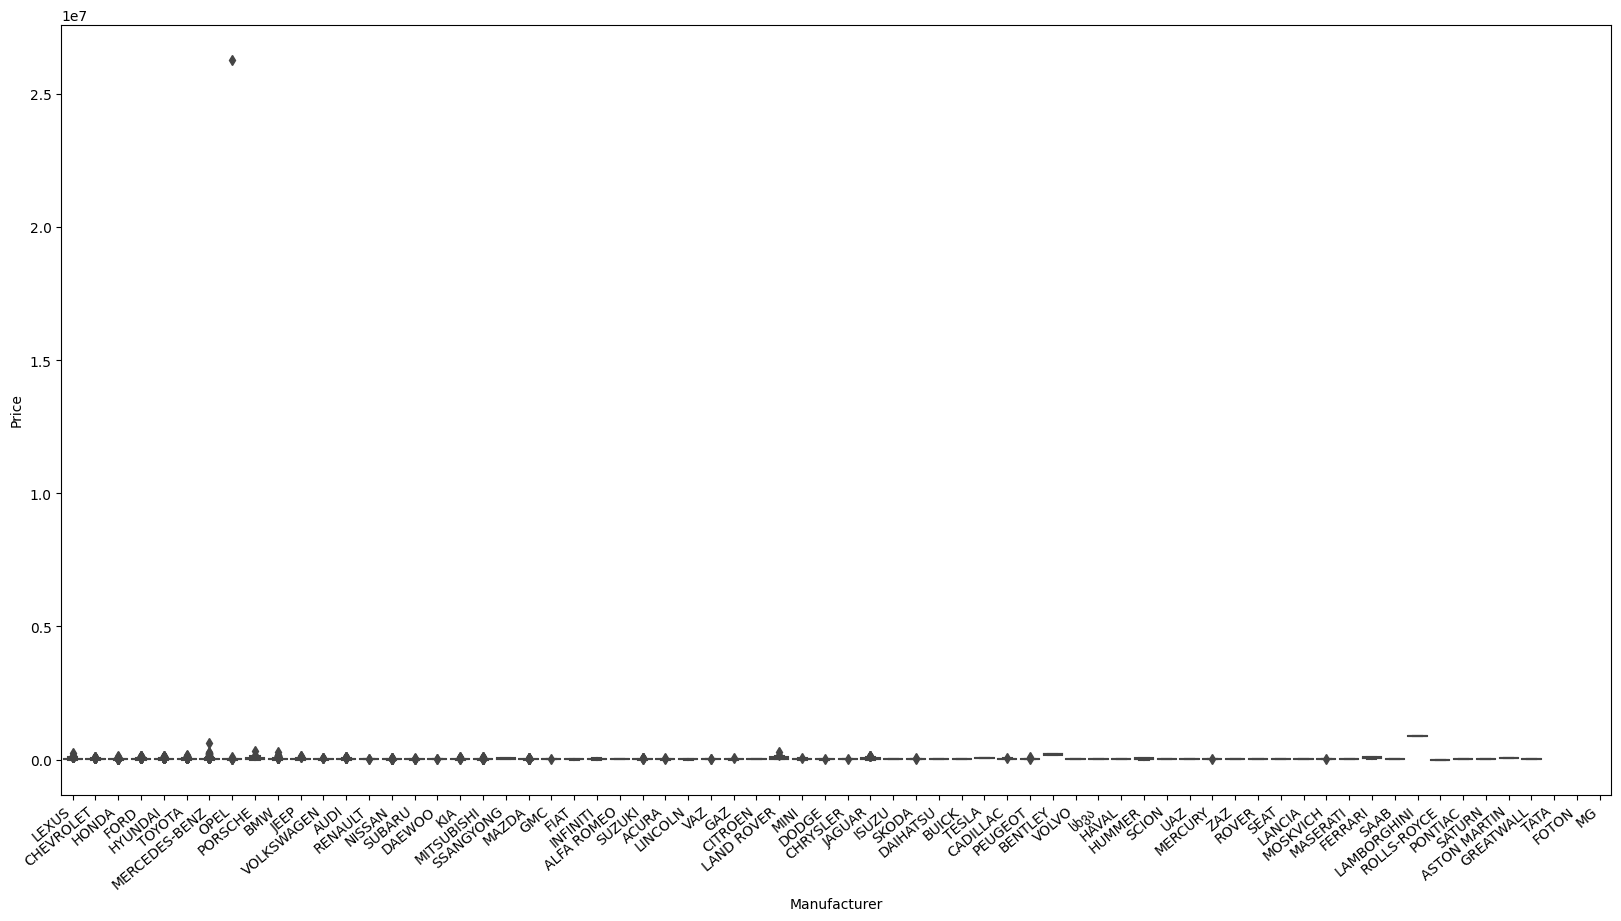

In [67]:
#Relationships of price and other variables : 
#Checking how price with other stuffs
import seaborn as sns
plt.subplots(figsize=(20,10))
ax=sns.boxplot(x='Manufacturer', y = y ,data=df_merge)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

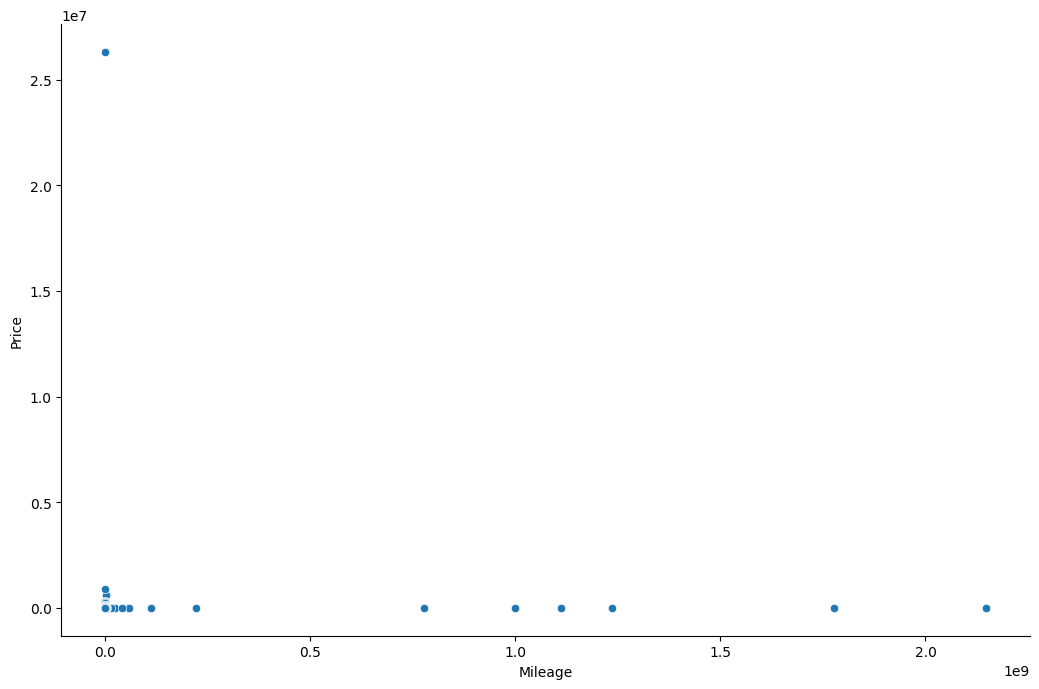

In [64]:
#Mileage vs Price
sns.relplot(x='Mileage',y=y,data=df_merge,height=7,aspect=1.5)

<Axes: xlabel='Fuel type', ylabel='Price'>

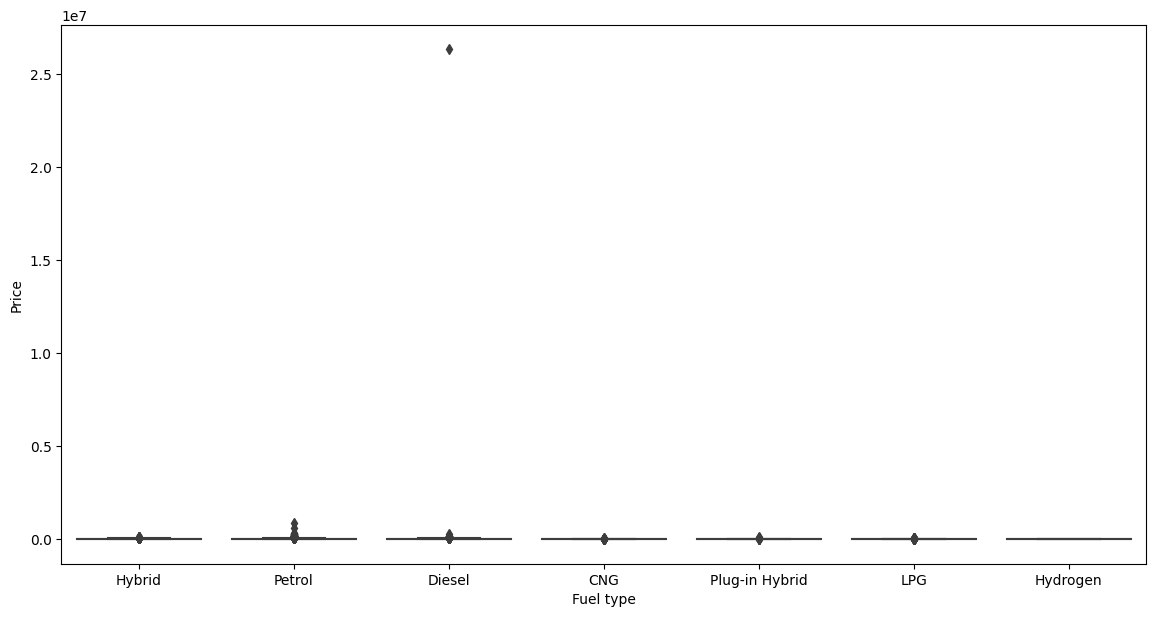

In [68]:
#Fuel vs Price
plt.subplots(figsize=(14,7))
sns.boxplot(x='Fuel type',y=y,data=df_merge)

<function matplotlib.pyplot.show(close=None, block=None)>

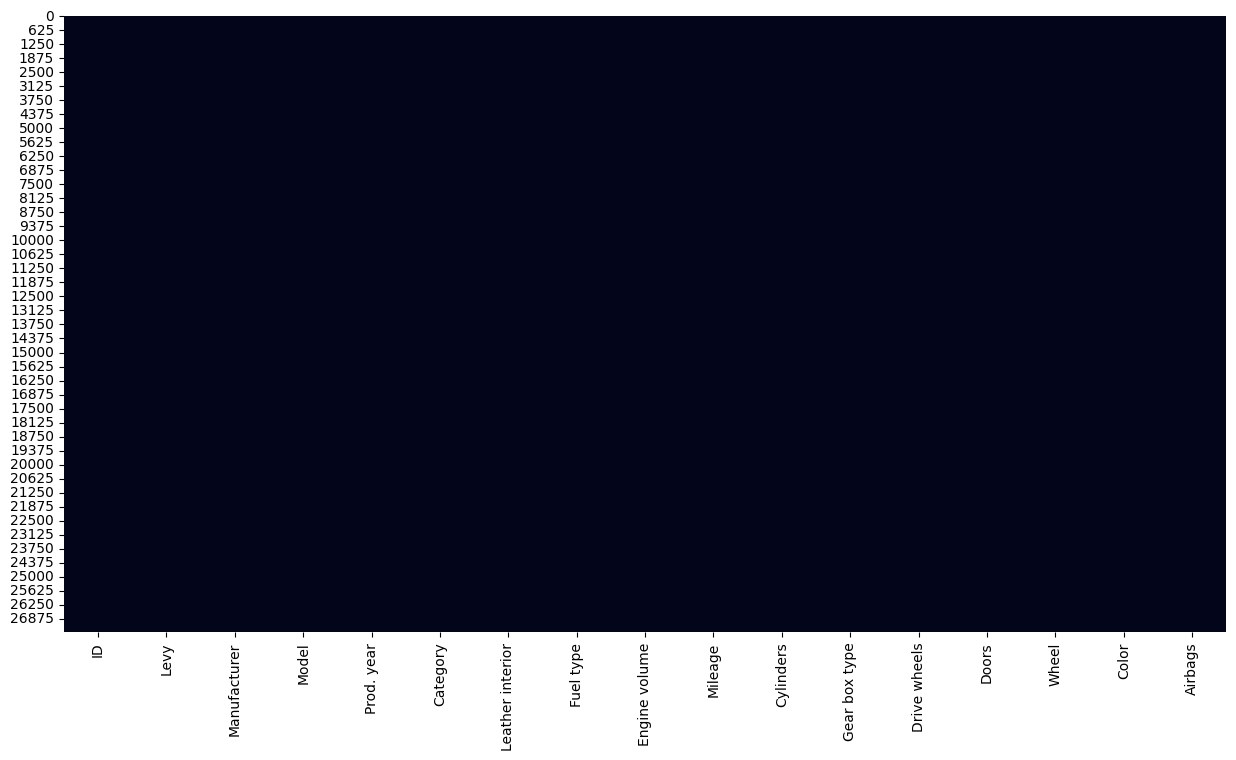

In [69]:
#Checking for missing values : 
sns.heatmap(df_merge.isnull(),cbar=False)
plt.show

<Axes: >

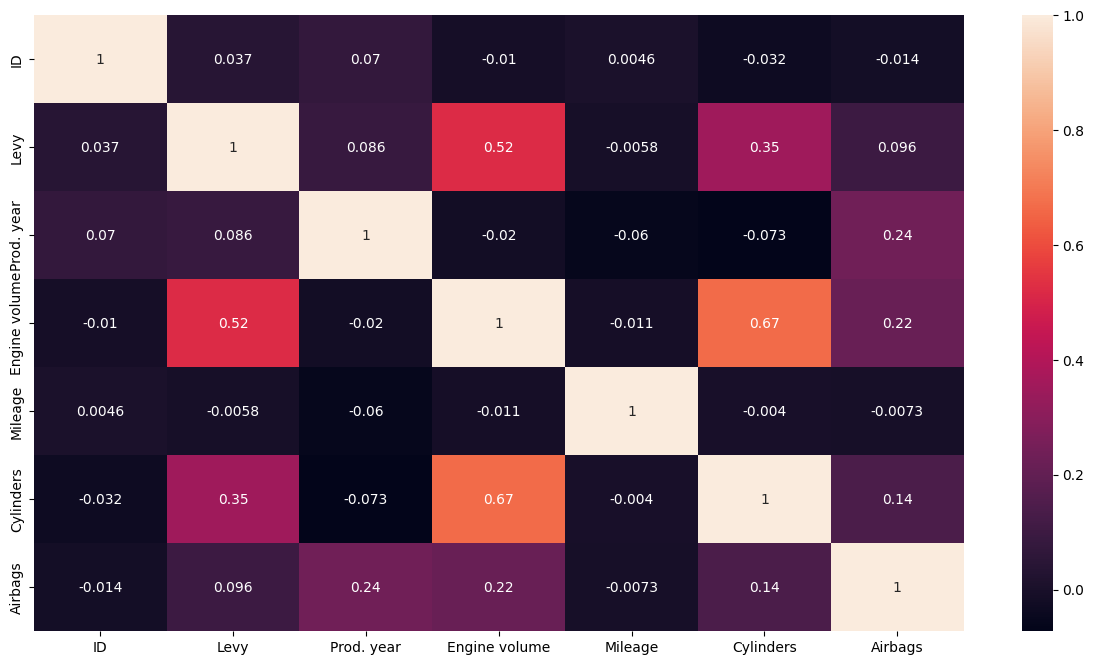

In [70]:
sns.heatmap(df_merge.corr(), cbar=True, annot=True)

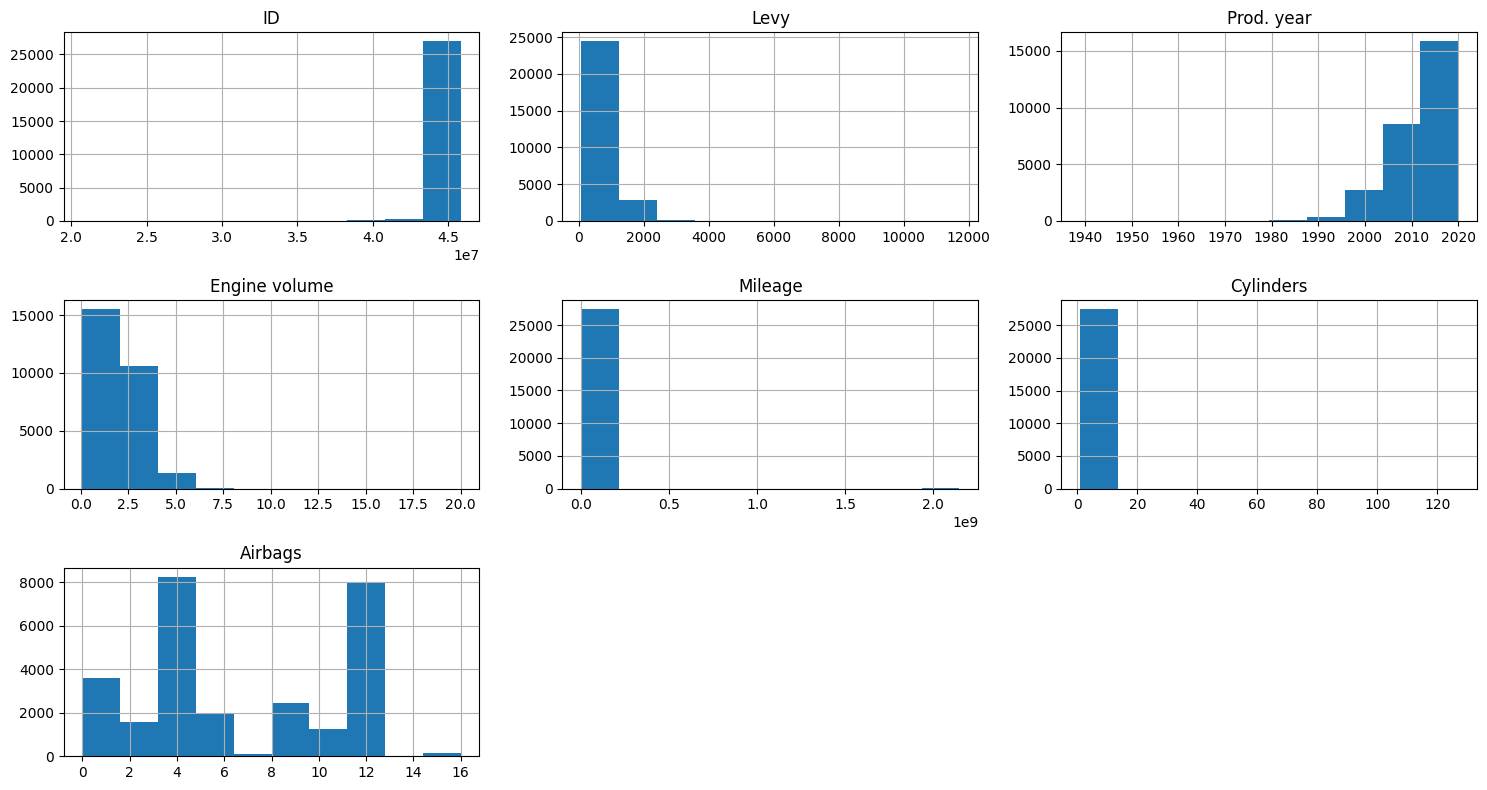

In [71]:
#Distribution of numeric variables
df_merge.hist()
plt.tight_layout()
plt.show()

In [72]:
#shapiro test to check the skewness of the target variable : Price
from scipy.stats import shapiro
x = shapiro(y)
if x[1] <= 0:
    print('Negatively skewed')
else:
    print('Positively Skewed')

Negatively skewed


In [73]:
#As from the shapiro test we can see that 'Price' column is negatively skewed we need to normlize it
y = np.log(y)

In [74]:
#Building the model :
categ = df_merge.select_dtypes(include='object')
num = df_merge.select_dtypes(include = np.number)

In [75]:
#Getting dummies for the categorical variables
cat_dummies = pd.get_dummies(categ,drop_first=True)

In [76]:
#creating the final dataset
df_final = pd.concat([num,cat_dummies], axis=1)

In [77]:
#segregating the training and test data before model building
train_data = df_final.iloc[:19237]
train_data.shape

(19237, 2094)

In [78]:
test_data = df_final.iloc[19237:]
test_data.shape

(8245, 2094)

In [84]:
#splitting the data into test and train
X = train_data
Y=y

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=10)

In [85]:
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [87]:
#Randomized Search CV for searching the best parameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [88]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [89]:
rf_model = RandomForestRegressor()

In [90]:
rf_random_model = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [91]:
rf_random_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  23.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  22.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [92]:
RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [93]:
#getting the best parameters
rf_random_model.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [94]:
#Extra Feature selection to avoid underfitting and overfitting 
reg= ExtraTreesRegressor()
reg.fit(X_train,y_train)
ExtraTreesRegressor()

ExtraTreesRegressor()

In [95]:
#Finding important features
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)

In [96]:
pd.DataFrame(feat_importances.nlargest(30)).index

Index(['Airbags', 'Mileage', 'Prod. year', 'ID', 'Gear box type_Tiptronic',
       'Leather interior_Yes', 'Levy', 'Manufacturer_HYUNDAI',
       'Fuel type_Hybrid', 'Engine volume', 'Fuel type_Diesel', 'Color_White',
       'Color_Black', 'Drive wheels_Front', 'Wheel_Right-hand drive',
       'Model_FIT', 'Color_Grey', 'Color_Silver', 'Cylinders',
       'Manufacturer_SSANGYONG', 'Gear box type_Variator', 'Category_Jeep',
       'Category_Sedan', 'Manufacturer_TOYOTA', 'Fuel type_Petrol',
       'Drive wheels_Rear', 'Color_Blue', 'Model_Prius', 'Category_Hatchback',
       'Manufacturer_LEXUS'],
      dtype='object')

In [97]:
#instantiating the randomforest regressor using the best parameters
mod4 = RandomForestRegressor(n_estimators= 1000, max_depth= 25,
 max_features= 'sqrt',
 min_samples_leaf=1,
 min_samples_split = 2
 )

In [98]:
X1 = train_data[['Airbags', 'Mileage', 'Prod. year', 'ID', 'Gear box type_Tiptronic',
       'Leather interior_Yes', 'Levy', 'Fuel type_Diesel', 'Engine volume',
       'Manufacturer_HYUNDAI', 'Fuel type_Hybrid', 'Color_White',
       'Color_Black', 'Drive wheels_Front', 'Model_FIT', 'Color_Grey',
       'Color_Silver', 'Cylinders', 'Wheel_Right-hand drive', 'Category_Sedan',
       'Manufacturer_TOYOTA', 'Category_Jeep', 'Gear box type_Variator',
       'Manufacturer_SSANGYONG', 'Fuel type_Petrol', 'Drive wheels_Rear',
       'Model_Prius']]
y1=y

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.3, random_state=10)

In [99]:
#Fitting the model
model = mod4.fit(X1_train, y1_train)

In [100]:
#predicting the data
y_predict=model.predict(X1_test)

In [101]:
#calculating the RMLSE score
RMLSE=np.sqrt(mean_squared_log_error(np.exp(y1_test),np.exp(y_predict)))

In [102]:
#Printing the RMLSE score
RMLSE

0.8422380084388943

In [103]:
mod3 = RandomForestRegressor(n_estimators= 1000, max_depth= 25,
 max_features= 'sqrt',
 min_samples_leaf=1,
 min_samples_split = 2
 )

In [104]:
model_random = mod3.fit(X_train, y_train)

In [105]:
feat_importances = pd.Series(model_random.feature_importances_, index=X_train.columns)

In [106]:
pd.DataFrame(feat_importances.nlargest(50)).index

Index(['ID', 'Mileage', 'Airbags', 'Prod. year', 'Levy',
       'Gear box type_Tiptronic', 'Engine volume', 'Fuel type_Hybrid',
       'Leather interior_Yes', 'Fuel type_Diesel', 'Cylinders',
       'Manufacturer_HYUNDAI', 'Fuel type_Petrol', 'Color_White',
       'Drive wheels_Front', 'Color_Black', 'Category_Sedan', 'Category_Jeep',
       'Color_Grey', 'Color_Silver', 'Wheel_Right-hand drive',
       'Category_Hatchback', 'Model_Santa FE', 'Gear box type_Variator',
       'Model_FIT', 'Manufacturer_SSANGYONG', 'Manufacturer_TOYOTA',
       'Manufacturer_HONDA', 'Model_E 350', 'Model_H1', 'Drive wheels_Rear',
       'Color_Blue', 'Model_Prius', 'Gear box type_Manual',
       'Manufacturer_LEXUS', 'Model_Tucson', 'Manufacturer_MERCEDES-BENZ',
       'Manufacturer_BMW', 'Fuel type_LPG', 'Model_Escape', 'Model_Camry',
       'Doors_04', 'Model_Sonata', 'Model_ML 350', 'Manufacturer_NISSAN',
       'Category_Minivan', 'Color_Red', 'Model_RX 450', 'Model_Actyon',
       'Model_Insight'],


In [107]:
X2=train_data[['Airbags', 'Mileage', 'Prod. year', 'ID', 'Gear box type_Tiptronic',
       'Leather interior_Yes', 'Levy', 'Fuel type_Diesel', 'Engine volume',
       'Manufacturer_HYUNDAI', 'Fuel type_Hybrid', 'Color_White',
       'Color_Black', 'Drive wheels_Front', 'Model_FIT', 'Color_Grey',
       'Color_Silver', 'Cylinders', 'Wheel_Right-hand drive', 'Category_Sedan',
       'Manufacturer_TOYOTA', 'Category_Jeep', 'Gear box type_Variator',
       'Manufacturer_SSANGYONG', 'Fuel type_Petrol', 'Drive wheels_Rear',
       'Model_Prius', 'Color_Blue', 'Category_Hatchback']]
Y2=y

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,Y2, test_size=0.3, random_state=10)

In [108]:
model1 = mod4.fit(X2_train, y2_train)

In [109]:
y_pred=model1.predict(X2_test)

In [118]:
RMLSE1=np.sqrt(mean_squared_log_error(np.exp(y2_test),np.exp(y_pred)))

In [111]:
RMLSE1

0.8434174545571839

In [124]:
#Saving the model with pickle
import pickle
pickle.dump(model1,open('model1_RMSE.pkl','wb'))

In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [148]:
df.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [149]:
#Removing km from mileage for cleaning purposes
df['Mileage'] = pd.to_numeric(df.Mileage.str.split(' ').str[0], downcast='float')

In [150]:
df['Mileage'] = np.where(df['Mileage'] == 0.0,df['Mileage'].mean(),df['Mileage'])

In [152]:
df['Doors'] = np.where((df['Doors'] == '04-May') | (df['Doors'] == '02-Mar'), df['Doors'].str.split('-').str[0],df['Doors'])

In [153]:
df['Doors'].unique()

array(['04', '02', '>5'], dtype=object)

In [156]:
df['Levy'].unique()
df['Levy'] = pd.to_numeric(df['Levy'].replace('-', '0'), downcast='float')

In [157]:
df['Levy'] = np.where(df['Levy'] == 0.0,df['Levy'].mean(),df['Levy'])

In [158]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [159]:
df['Engine volume'] = pd.to_numeric(df['Engine volume'].str.split(' ').str[0], downcast='float')

In [160]:
df['Engine volume']=np.where(df['Engine volume'] == 0.0,df['Engine volume'].mean(),df['Engine volume'])

In [161]:
df.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,1399.000000,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Left wheel,Silver,12
1,44731507,1018.000000,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04,Left wheel,Black,8
2,45774419,632.528687,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04,Right-hand drive,Black,2
3,45769185,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04,Left wheel,White,0
4,45809263,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04,Left wheel,Silver,4


In [162]:
X = df[['Model','Manufacturer','Prod. year','Mileage','Fuel type']]

In [164]:
X

,Model,Manufacturer,Prod. year,Mileage,Fuel type
0,RX 450,LEXUS,2010,186005.0,Hybrid
1,Equinox,CHEVROLET,2011,192000.0,Petrol
2,FIT,HONDA,2006,200000.0,Petrol
3,Escape,FORD,2011,168966.0,Hybrid
4,FIT,HONDA,2014,91901.0,Petrol
...,...,...,...,...,...
19232,CLK 200,MERCEDES-BENZ,1999,300000.0,CNG
19233,Sonata,HYUNDAI,2011,161600.0,Petrol
19234,Tucson,HYUNDAI,2010,116365.0,Diesel
19235,Captiva,CHEVROLET,2007,51258.0,Diesel


In [173]:
y.shape

(19237,)

In [174]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [175]:
ohe=OneHotEncoder()
ohe.fit(X[['Model','Manufacturer', 'Fuel type']])

OneHotEncoder()

In [177]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Model','Manufacturer','Fuel type']),
                                    remainder='passthrough')

In [178]:
#Running a Linear Regression Model
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['09-Mar', '100', '100 NX', ..., 'macan S', 'tC', 'xD'],
      dtype=object),
                                                                            array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'CITROEN', 'DAEWOO',
       'DAIHATSU', 'DODGE', 'F...
       'NISSAN', 'OPEL', 'PEUGEOT', 'PONTIAC', 'PORSCHE', 'RENAULT',
       'ROLLS-ROYCE', 'ROVER', 'SAAB', 'SATURN', 'SCION', 'SEAT', 'SKODA',
       'SSANGYONG', 'SUBARU', 'SUZUKI', 'TESLA', 'TOYOTA', 'UAZ', 'VAZ',
       'VOLKSWAGEN', 'VOLVO', 'ZAZ', 'სხვა'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'Hybrid', 'Hydrogen', 'LPG', 'Petrol',
       'Plug-in Hybrid'], dtype=object)]),
                                                  ['Model', 'Manufacturer',
                                                   'Fuel type'])])),
                ('linearregression', LinearRegression())])

In [179]:
y_pred=pipe.predict(X_test)

In [180]:
r2_score(y_test,y_pred)

-0.0008445863924819719

In [181]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))


In [182]:
np.argmax(scores)

983

In [183]:
scores[np.argmax(scores)]

0.0024409955559755447

In [185]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.0024409955559755447

In [187]:
!mv '/content/model1_RMSE.pkl' '/content/drive/MyDrive'

mv: cannot stat '/content/model1_RMSE.pkl': No such file or directory
